In [3]:
import findspark
findspark.init()

In [4]:
findspark.find()

'F:\\Hadoop\\spark'

In [ ]:
import pyspark
from pyspark import SparkContext,SparkConf
conf = pyspark.SparkConf().setAppName('Distribution').setMaster('local')
sc = pyspark.SparkContext(conf=conf)

In [27]:
popApt = sc.textFile('file:///C:/Users/Ashwini/Desktop/rankAirports')

In [ ]:
!pip install matplotlib

In [2]:
import matplotlib

In [6]:
from matplotlib import pyplot as plt  


In [ ]:
popApt.collect()

In [28]:
popApt = popApt.map(lambda line : line.split()).filter(lambda row:len(row[0])==3).filter(lambda row:len(row)==2).map(lambda line:(line[0],int(line[1]))).collect() #

In [ ]:
print(popApt)

In [31]:
array = []
for row in popApt:
    array.append(float(row[1]))

In [32]:
array

[228782.0,
 38376.0,
 1414760.0,
 15177.0,
 3267.0,
 37238.0,
 43946.0,
 16882.0,
 1032.0,
 18015.0,
 32867.0,
 99886.0,
 10837.0,
 539578.0,
 2097.0,
 242649.0,
 721072.0,
 821.0,
 7264.0,
 24889.0,
 11298234.0,
 45200.0,
 1487634.0,
 106374.0,
 86755.0,
 117555.0,
 1195662.0,
 35285.0,
 1.0,
 1.0,
 69664.0,
 49305.0,
 99705.0,
 754838.0,
 172002.0,
 90544.0,
 375.0,
 13231.0,
 41636.0,
 2193658.0,
 444989.0,
 4150490.0,
 16397.0,
 13233.0,
 16167.0,
 28013.0,
 23123.0,
 20600.0,
 278642.0,
 204561.0,
 903049.0,
 1077875.0,
 3174744.0,
 132919.0,
 313077.0,
 150900.0,
 1.0,
 7916.0,
 7192.0,
 27825.0,
 11757.0,
 131951.0,
 36491.0,
 412602.0,
 13770.0,
 234963.0,
 14.0,
 27165.0,
 2655426.0,
 35906.0,
 4725820.0,
 1400439.0,
 50211.0,
 970.0,
 12991.0,
 499981.0,
 49638.0,
 227640.0,
 113491.0,
 34705.0,
 3600761.0,
 13206.0,
 2.0,
 163362.0,
 1761529.0,
 704537.0,
 17683.0,
 3345005.0,
 6166458.0,
 50645.0,
 10558647.0,
 19964.0,
 8768.0,
 60654.0,
 36688.0,
 408880.0,
 5490416.0,
 9

In [33]:
#intialize spark session first before creating a dataframe
from pyspark.sql import SparkSession
spark = SparkSession(sc)

In [43]:
!pip install powerlaw

  Created wheel for powerlaw: filename=powerlaw-1.4.6-py3-none-any.whl size=24793 sha256=ae2b4879fdcf179bde3b882751539c41cbb32c0964c0559509cf9bd07cba685f
  Stored in directory: c:\users\ashwini\appdata\local\pip\cache\wheels\ee\51\38\2e0f20cf80e1a0909acdd527df2288bd9feb8356b926d7d775
Successfully built powerlaw


In [37]:
import powerlaw

In [38]:
fit = powerlaw.Fit(array)

Calculating best minimal value for power law fit
C:\Users\Ashwini\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


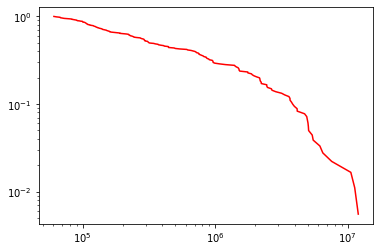

In [39]:
fig = fit.plot_ccdf(color='r', label='Empirical Data')

In [40]:
fit.power_law.plot_ccdf(ax=fig, color='b', linestyle='-', label='Power Law')

C:\Users\Ashwini\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [41]:
import matplotlib.pyplot as plt
fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='-', label='Log Normal')


C:\Users\Ashwini\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


In [42]:
R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R,p)


-3.5442411161248812 0.0003937449777681864


Calculating best minimal value for power law fit
C:\Users\Ashwini\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\Ashwini\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))
C:\Users\Ashwini\anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Power law alpha: 1.494627
Power law D: 0.101342
Power law xmin: 60654
Log normal mu: 11.941681
Log normal sigma: 2.048870
-3.5442411161248812 0.0003937449777681864


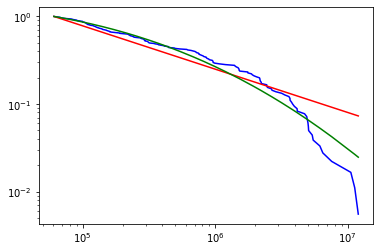

In [43]:
fit = powerlaw.Fit(array)
fig = fit.plot_ccdf(color='b', label='Empirical Data')
fit.power_law.plot_ccdf(ax=fig, color='r', linestyle='-', label='Power Law')

print('Power law alpha: %f' % fit.power_law.alpha)
print('Power law D: %f' % fit.power_law.D)
print('Power law xmin: %d' % fit.power_law.xmin)

fit.lognormal.plot_ccdf(ax=fig, color='g', linestyle='-', label='Log Normal')
print('Log normal mu: %f' % fit.lognormal.mu)
print('Log normal sigma: %f' % fit.lognormal.sigma)

R, p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio=True)
print(R,p)